# Tutorial de Big Data
## Bienvenidos a la clase 3

### Temario:

- Introducción a tweepy, textblob, nltk
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones
- Introducción al TP1 parte 2 
- GitHub para entregar los TPs

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [1]:
#importamos los paquetes a utilizar
import os
import re
import string
from datetime import timezone as tz
from datetime import datetime 

import pandas as pd
import tweepy
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt') #No cargado antes
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Si alguien quiere trabajar con alguna cuenta en español podrían instalar 
#sentiment_analysis_spanish y utilizarlo en reemplado de TextBlob:
#!{sys.executable} -m pip install sentiment_analysis_spanish
#from sentiment_analysis_spanish import sentiment_analysis
# y pueden crearse una lista de stopwords con las de este link:
# https://github.com/xiamx/node-nltk-stopwords/blob/master/data/stopwords/spanish
# También usaremos string.punctuation. Si trabajan en español podrian agregarle  
# ¿ y ¡ . En ingles incluye lo siguiente: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#import sys
#!{sys.executable} -m pip install tweepy

Para generar las claves vayan a: 
https://developer.twitter.com/en/portal/dashboard

- Luego a Projects & Apps
- Luego Overview
- Luego + Create App

Crear con Sublime (u otro editor de texto) un archivo llamado `twitter_keys.txt` dentro de la carpeta `Tutorial3` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [5]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [7]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

En este link pueden explorar detalles del metodo user_timeline: https://docs.tweepy.org/en/stable/api.html?highlight=user_timeline#tweepy.API.user_timeline

In [8]:
api.user_timeline(screen_name="JoeBiden",tweet_mode="extended")


[Status(_api=<tweepy.api.API object at 0x0000023353A0C970>, _json={'created_at': 'Wed Aug 31 21:32:17 +0000 2022', 'id': 1565090122898542592, 'id_str': '1565090122898542592', 'full_text': 'Whose side are you on? https://t.co/fKlr9pi2eP', 'truncated': False, 'display_text_range': [0, 22], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1565090051771473920, 'id_str': '1565090051771473920', 'indices': [23, 46], 'media_url': 'http://pbs.twimg.com/media/FbhRK4wXwAQe-hP.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FbhRK4wXwAQe-hP.jpg', 'url': 'https://t.co/fKlr9pi2eP', 'display_url': 'pic.twitter.com/fKlr9pi2eP', 'expanded_url': 'https://twitter.com/JoeBiden/status/1565090122898542592/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1080, 'h': 1080, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1080, 'resize': 'fit'}}}]}, 'extended_entities

In [9]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos
    Input: 
      screen_name (str): el nombre de la persona en twitter
      start_date(datetime): fecha desde la que se quieren los tweets
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [10]:
# Extraemos los tweets desde unos días antes de las elecciones del 
# 3 de Noviembre de 2020
date_before_elections = datetime(2020, 10, 16, 0, 0, 0, tzinfo=tz.utc)
all_tweets_biden = get_all_tweets("JoeBiden", date_before_elections)

Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets
Hasta ahora se han extraido 1000 tweets
Hasta ahora se han extraido 1200 tweets
Hasta ahora se han extraido 1400 tweets
Hasta ahora se han extraido 1600 tweets
Hasta ahora se han extraido 1800 tweets
Hasta ahora se han extraido 1999 tweets
Hasta ahora se han extraido 2199 tweets
Hasta ahora se han extraido 2399 tweets


In [11]:
#Veamos la lista con los primeros 5 objetos de tweepy 
all_tweets_biden[:5]


[Status(_api=<tweepy.api.API object at 0x0000023353A0C970>, _json={'created_at': 'Wed Aug 31 21:32:17 +0000 2022', 'id': 1565090122898542592, 'id_str': '1565090122898542592', 'full_text': 'Whose side are you on? https://t.co/fKlr9pi2eP', 'truncated': False, 'display_text_range': [0, 22], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1565090051771473920, 'id_str': '1565090051771473920', 'indices': [23, 46], 'media_url': 'http://pbs.twimg.com/media/FbhRK4wXwAQe-hP.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FbhRK4wXwAQe-hP.jpg', 'url': 'https://t.co/fKlr9pi2eP', 'display_url': 'pic.twitter.com/fKlr9pi2eP', 'expanded_url': 'https://twitter.com/JoeBiden/status/1565090122898542592/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1080, 'h': 1080, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1080, 'resize': 'fit'}}}]}, 'extended_entities

In [12]:
# Veamos un solo tweet 
all_tweets_biden[8].full_text

'My plan for student loan relief allows those with undergraduate loans the chance to sign up and cap their loan payments at 5% of their monthly income. \n\nFind out more at https://t.co/jHpKgsh7dY.'

In [13]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    for tweet in all_tweets:
        one_tweet = [tweet.id_str, tweet.created_at, tweet.full_text, 
                     tweet.retweeted, tweet.favorite_count, 
                     tweet.in_reply_to_screen_name]
        all_tweets_selection.append(one_tweet)
    
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

In [14]:
help(save_tweets_text)

Help on function save_tweets_text in module __main__:

save_tweets_text(all_tweets, csv_file=None)
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados



In [15]:
df_all_tweets = save_tweets_text(all_tweets_biden, "tweets.csv")
df_all_tweets

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1565090122898542592,2022-08-31 21:32:17+00:00,Whose side are you on? https://t.co/fKlr9pi2eP,False,10990,None
1,1565048030067310595,2022-08-31 18:45:02+00:00,The American Rescue Plan took America from an ...,False,13083,None
2,1565007006443995138,2022-08-31 16:02:01+00:00,We’ve come a long way. COVID no longer control...,False,14675,None
3,1564772708809936900,2022-08-31 00:31:00+00:00,Every single Republican member of Congress vot...,False,75888,None
4,1564742510408261633,2022-08-30 22:31:00+00:00,The extreme MAGA Republicans have made their c...,False,79374,None
...,...,...,...,...,...,...
2394,1313319274677768193,2020-10-06 03:24:50+00:00,I couldn’t let #WorldTeachersDay go by without...,False,129173,None
2395,1313304721092997125,2020-10-06 02:27:00+00:00,Wear a mask. https://t.co/TSuLuzAXEB,False,560915,None
2396,1313288363361931265,2020-10-06 01:22:00+00:00,"Folks, I just wrapped up my NBC Town Hall wher...",False,23982,None
2397,1313287105213165569,2020-10-06 01:17:00+00:00,The future is yours. I'm counting on you. http...,False,49988,None


In [16]:
# Emoticons contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticons Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [17]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [18]:
#mrhod clean_tweets()
def clean_tweets(tweet):
    '''
    Esta función limpia el texto del tweet. Elimina emoticones, palabras vacías,
    links, indicaciones de retweets, etc. Para dejar en el texto solo las
    palabras con mayor contenido.
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Saco los emoji
    tweet = emoji_pattern.sub(r'', tweet)
    
    #Separo los tweets in tokens
    word_tokens = word_tokenize(tweet)
    #Obtengo set de palabras vacias para luego eliminarlas
    stop_words = set(stopwords.words('english'))
    
    #loop por las condiciones
    filtered_tweet = []
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and \
           w not in string.punctuation:
            filtered_tweet.append(w)

    
    return ' '.join(filtered_tweet)

In [19]:
#Este es un tweet sucio:
df_all_tweets.iloc[0]['text']

'Whose side are you on? https://t.co/fKlr9pi2eP'

In [20]:
#Este es un tweet limpio:
clean_tweets(df_all_tweets.iloc[0]['text'])

'Whose side'

In [21]:
def filter_year_and_month(date_tweet, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''
    dd = pd.to_datetime(date_tweet).date()
    return dd > start_time and dd < end_time
 

In [22]:
def generate_sentiment(texto):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        texto (str): texto a limpiar y analizar
    Output:
         polarity (float): en el rango [-1.0, 1.0] 
         subjectivity (float): en el rango [0.0, 1.0] 
    '''
    # Limpiamos el texto del tweet
    filtered_tweet = clean_tweets(texto)
    # Calculamos el sentimiento con el metodo TextBlob
    blob = TextBlob(filtered_tweet)
    Sentiment = blob.sentiment

    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity            

    return polarity, subjectivity
    

Polarity: Negative (-1.0) vs. Positive (1.0)

Subjectivity: Objective (0.0) vs. Subjective (1.0)

In [23]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion filtra los tweets entre las fechas de inicio y fin
    indicadas y agrega dos columnas, una de polarity y otra de subjectivity.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y nuevas columnas
    '''
    df = df[df.apply(lambda row: filter_year_and_month(row['created_at'], 
                                                start_time, end_time), axis=1)]

    df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_sentiment(row['text']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

In [24]:
start_time = datetime.strptime("2020-10-20", '%Y-%m-%d').date()
end_time = datetime.strptime("2020-11-18", '%Y-%m-%d').date()


In [25]:
tweets_sentimiento = add_sentiment(df_all_tweets, start_time, end_time)
tweets_sentimiento

C:\Users\Matias\AppData\Local\Temp\ipykernel_4660\548788201.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
C:\Users\Matias\AppData\Local\Temp\ipykernel_4660\548788201.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity
1628,1328837822950752259,2020-11-17 23:10:00+00:00,"Today, @KamalaHarris and I met with some of ou...",False,112639,None,0.500000,0.700000
1629,1328790008963227649,2020-11-17 20:00:00+00:00,I’m keeping in my prayers all of our friends a...,False,258312,None,0.266667,0.583333
1630,1328734005404061701,2020-11-17 16:17:28+00:00,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000
1631,1328474177007972354,2020-11-16 23:05:00+00:00,Americans want us to cooperate. They want us t...,False,129034,None,0.500000,0.812500
1632,1328467885279375361,2020-11-16 22:40:00+00:00,"When we build back better, we will do so with ...",False,189262,None,0.250000,0.285714
...,...,...,...,...,...,...,...,...
2117,1318937589097717760,2020-10-21 15:30:00+00:00,Justice is on the ballot.\n\nhttps://t.co/eoxT...,False,22999,None,0.000000,0.000000
2118,1318919971653578752,2020-10-21 14:20:00+00:00,West Virginia — in-person early voting is now ...,False,17466,None,0.050000,0.400000
2119,1318915442153562115,2020-10-21 14:02:00+00:00,Missouri — today is the last day to request a ...,False,13949,None,0.000000,0.066667
2120,1318753877076881408,2020-10-21 03:20:00+00:00,It’s time we see each other as fellow American...,False,108747,None,0.318182,0.550000


In [26]:
tweets_sentimiento.shape

(494, 8)

## Trabajo Practico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el codigo sea facíl de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 29/8 a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- Tambíen deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1qaXCveEw3MjEwXQsu2zpqUz34BiaCMR0WapcsQ7jGs0/edit?usp=sharing
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, yo no corregiré sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de habér entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1: 
Impriman algunos de los tweets más negativos (filtrando por la columna de `polarity`) y su fecha

In [27]:
ts_negativos = tweets_sentimiento.sort_values(by='polarity',ascending=True).head(n=10)[["text","created_at"]]
for index, row in ts_negativos.iterrows():
    fecha = row['created_at']
    texto = row['text']
    print(f'A la fecha {fecha} el POTUS twiteo "{texto}", siendo uno de sus twits mas negativos.')

A la fecha 2020-11-03 02:50:00+00:00 el POTUS twiteo "After tonight's horrific terrorist attack in Vienna, Austria, Jill and I are keeping the victims and their families in our prayers. We must all stand united against hate and violence.", siendo uno de sus twits mas negativos.
A la fecha 2020-11-11 00:45:00+00:00 el POTUS twiteo "If you’re sick, if you’re struggling, if you’re worried about how you’re going to get through the day — we will not abandon you.

We will not leave you to face these challenges alone. https://t.co/eZUHaFE5bl", siendo uno de sus twits mas negativos.
A la fecha 2020-11-13 21:05:00+00:00 el POTUS twiteo "Today marks five years since the horrific ISIS terrorist attacks in Paris — an assault not just on the people of France but against our common humanity.

As president, I will work to protect Americans and our allies, countering terrorism and extremist violence in all forms.", siendo uno de sus twits mas negativos.
A la fecha 2020-11-01 02:04:00+00:00 el POTUS tw

#### Ejercicio 2: 
Impriman algunos de los tweets más positivos (filtrando por la columna de `polarity`) y su fecha

In [28]:
ts_positivos = tweets_sentimiento.sort_values(by='polarity',ascending=False).head(n=10)[["text","created_at"]]
for index, row in ts_positivos.iterrows():
    fecha = row['created_at']
    texto = row['text']
    print(f'A la fecha {fecha} el POTUS twiteo "{texto}", siendo uno de sus twits mas positivos.')

A la fecha 2020-10-29 20:45:00+00:00 el POTUS twiteo "Christen — tell your grandmother I’m incredibly grateful to have her support, and thank you for helping her cast her ballot. https://t.co/zRKbAPvqgF", siendo uno de sus twits mas positivos.
A la fecha 2020-11-16 14:07:25+00:00 el POTUS twiteo "Once again, I congratulate the brilliant women and men who produced this breakthrough and have brought us one step closer to beating this virus. I am also thankful for the frontline workers who are still confronting the virus around the clock.", siendo uno de sus twits mas positivos.
A la fecha 2020-11-08 01:56:00+00:00 el POTUS twiteo "Now that the campaign is over—what is the people’s will? What is our mandate?

I believe it is this: Americans have called on us to marshal the forces of decency and the forces of fairness. To marshal the forces of science and the forces of hope in the great battles of our time.", siendo uno de sus twits mas positivos.
A la fecha 2020-11-04 05:53:00+00:00 el PO

###### Ejercicio 3: 
Agreguenle al df llamado `tweets_sentimiento` una nueva columna llamada `positivo` que tenga:
- 1 cuando el tweet tiene polarity > 0, 
- 0 cuando el tweet tiene polarity = 0, 
- -1 cuando el tweet tiene polarity < 0 

In [29]:
tweets_sentimiento['positivo'] = 1
tweets_sentimiento.loc[(tweets_sentimiento['polarity'] == 0), 'positivo'] = 0
tweets_sentimiento.loc[(tweets_sentimiento['polarity'] <0 ), 'positivo'] = -1

C:\Users\Matias\AppData\Local\Temp\ipykernel_4660\4292448611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento['positivo'] = 1


In [30]:
tweets_sentimiento

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity,positivo
1628,1328837822950752259,2020-11-17 23:10:00+00:00,"Today, @KamalaHarris and I met with some of ou...",False,112639,None,0.500000,0.700000,1
1629,1328790008963227649,2020-11-17 20:00:00+00:00,I’m keeping in my prayers all of our friends a...,False,258312,None,0.266667,0.583333,1
1630,1328734005404061701,2020-11-17 16:17:28+00:00,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000,0
1631,1328474177007972354,2020-11-16 23:05:00+00:00,Americans want us to cooperate. They want us t...,False,129034,None,0.500000,0.812500,1
1632,1328467885279375361,2020-11-16 22:40:00+00:00,"When we build back better, we will do so with ...",False,189262,None,0.250000,0.285714,1
...,...,...,...,...,...,...,...,...,...
2117,1318937589097717760,2020-10-21 15:30:00+00:00,Justice is on the ballot.\n\nhttps://t.co/eoxT...,False,22999,None,0.000000,0.000000,0
2118,1318919971653578752,2020-10-21 14:20:00+00:00,West Virginia — in-person early voting is now ...,False,17466,None,0.050000,0.400000,1
2119,1318915442153562115,2020-10-21 14:02:00+00:00,Missouri — today is the last day to request a ...,False,13949,None,0.000000,0.066667,0
2120,1318753877076881408,2020-10-21 03:20:00+00:00,It’s time we see each other as fellow American...,False,108747,None,0.318182,0.550000,1


#### Ejercicio 4: 
Agrupen los tweets por día y promedien el la polaridad. Luego hagan un gráfico con el sentimiento por día.

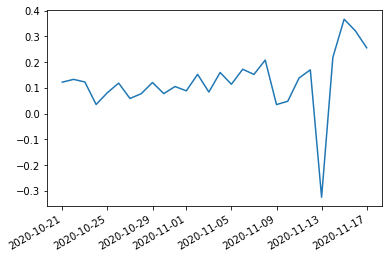

In [31]:
import matplotlib.pyplot as plt
tweets_sentimiento_daily = tweets_sentimiento.groupby([tweets_sentimiento['created_at'].dt.date])['polarity'].mean()
plt.plot(tweets_sentimiento_daily)
plt.gcf().autofmt_xdate()
plt.show()

#### Repaso del análisis de sentimiento: 
Por último, los invito a que exploren el análisis de sentimiento de forma teórica y práctica:
- Revisen la documentación de `TextBlob` y del método `sentiment` https://textblob.readthedocs.io/en/dev/ 
- Prueben en la practica el resultado que arroja para determinadas frases (les dejo unos ejemplos, pero pueden probar los que quieran)


In [32]:
text = '''
Economists are better than sociologists and digital business students.
Group two is Big Data's best group. 
Long live Peron, god damn it.
Nestor is alive.
People are all Peronists and Boca fans, only some don't know it yet.
We can Peronize the world.
Guillermo Moreno would be a great president.
It's because dollars are missing, it's all the fault of Mauricio Macri and the external restriction.
'''

blob = TextBlob(text)


for sentence in blob.sentences:
    print(f'La oracion "{sentence}" presenta un indice de polaridad de {sentence.sentiment.polarity} y un indice de subjetividad de {sentence.sentiment.subjectivity}.')

La oracion "
Economists are better than sociologists and digital business students." presenta un indice de polaridad de 0.25 y un indice de subjetividad de 0.25.
La oracion "Group two is Big Data's best group." presenta un indice de polaridad de 0.5 y un indice de subjetividad de 0.2.
La oracion "Long live Peron, god damn it." presenta un indice de polaridad de 0.043181818181818175 y un indice de subjetividad de 0.45.
La oracion "Nestor is alive." presenta un indice de polaridad de 0.1 y un indice de subjetividad de 0.4.
La oracion "People are all Peronists and Boca fans, only some don't know it yet." presenta un indice de polaridad de 0.0 y un indice de subjetividad de 1.0.
La oracion "We can Peronize the world." presenta un indice de polaridad de 0.0 y un indice de subjetividad de 0.0.
La oracion "Guillermo Moreno would be a great president." presenta un indice de polaridad de 0.8 y un indice de subjetividad de 0.75.
La oracion "It's because dollars are missing, it's all the fault of

<span style='background :yellow' > Gran elección de frases